# Results notebook

In [102]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
#from bs4 import BeautifulSoup

from src.preprocessing import WikispeediaData
from src.similarity import *
from src.shortest_paths import *
from src.sum_graph import *
from src.hubs_analysis import *
from src.unfinished_games import *
from src.plot_functions import *
from src.pagerankVSfreqeuency import *
from src.common_paths import *
from src.fork import *
from src.hubs_frequency import get_hub_positions, plot_hub_positions


# Wikispeedia : Hubs, User Patterns, and what can they say about Common Knowledge

In this notebook, we present the results of our data analysis on the Wikispeedia dataset. This work builds on our data story, which is available here: [Wikispeedia Data Story](https://madhueb.github.io/website/).  

The primary goal of this analysis is to identify hubs and explore user navigation patterns within the Wikispeedia game. In this game, players navigate from a starting article to a target article on Wikipedia using only clickable links between pages. By analyzing these navigation patterns, we aim to uncover the structural properties of Wikipedia’s hyperlink network and understand whether these patterns can offer insights into common knowledge. 

This project focuses on two key themes: the role of hubs—highly connected articles within the network—and user navigation behaviors. Specifically, we seek to address the following questions:

1. **Hubs in Navigation:**  
    - What are the defining characteristics of a hub?
    - Which articles serve as the largest hubs on Wikispeedia, and how frequently are they used by players?
    - What types of information are most often contained within hubs, and how are the hubs related to other articles or subject categories?

2. **Patterns of Exploration:**  
   - Do users exhibit similar behaviors when navigating Wikipedia’s network?  
   - What paths are most commonly taken by players, and what does this reveal about public knowledge and associations?
   - Where do players tend to "block" or abandon their paths, and what kinds of topics or articles are associated with these unfinished paths?

3. **Evidence for Common Knowledge:**  
   - Can we determine areas of common knowledge or knowledge gaps by comparing user patterns with hubs?
   - How do hubs affect the efficiency of user paths? Do users who navigate through hubs tend to complete paths more successfully or with fewer clicks?

By studying the characteristics and usage of hubs, analyzing common and abandoned paths, and more, we gain valuable insights into Wikipedia’s structure and how users interact with it. Ultimately, our findings explore the relationship between common knowledge, user behavior, and the interplay between network structure and navigation strategies.  

To answer these questions, we first present a rapid introduction to the dataset. Then our analysis is divided into three main sections: Hubs in Navigation, Patterns of Exploration, and Evidence for Common Knowledge. Each section is dedicated to the questions presented above and includes detailed insights, visualizations, and interpretations of the results. 

In [3]:
#Creating data object, dictionary of dataframes
data = WikispeediaData()

In [4]:
#Setting theme for plots
sns.set_theme() 

## Wikipedia in the Wikispeedia game

We begin by exploring the version of Wikipedia linked to our Wikispeedia dataset. This exploration will help us understand the scope and structure of the data we are working with.

In [5]:
print('Number of articles in Wikispeedia version of Wikipedia', len(data.articles))

Number of articles in Wikispeedia version of Wikipedia 4604


In [6]:
print('Maximum shortest path between one article to another:', max(map(np.nanmax, data.matrix)))

Maximum shortest path between one article to another: 9.0


From this data we can see that the version of Wikipedia in Wikispeedia containts 4604 articles and if it is possible to navigate from one article to another the target article is maximum 9 clicks away. That means from one article to any other which it is possible to navigate to 9 is the maximum number of clicks you might have to do to reach the target article. Now let's analyse the distribution of categories! 

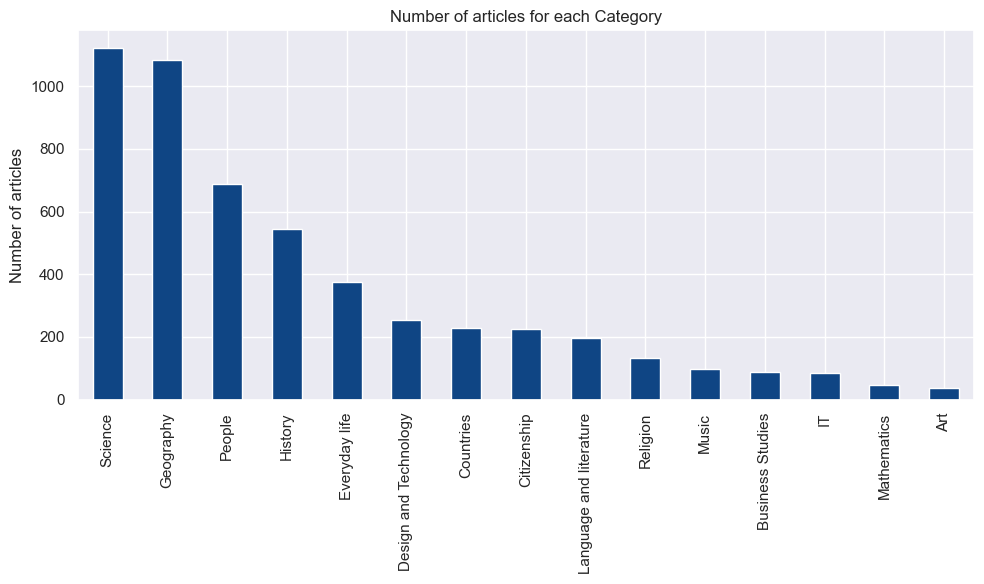

In [7]:
plot_category_distribution(data.categories['1st cat'], 'Number of articles for each Category')

The figure above shows the distributions of categories on Wikipedia. Note that each article is categoriesed as belonging to one or more topics. The category of an article is not neccesarily unique as one article can belong to several topics for example Wood which belongs to both the Science and Design and Technology, see results below. We can see that the most common categories of articles are Science and Geography.

In [8]:
print('Categories for article Wood:')
print(data.categories['1st cat'].loc[data.categories['article_name']=='Wood'].values)

Categories for article Wood:
['Design and Technology' 'Science']


We can also visualize the links between all articles in the dataset. The figure below shows the network of articles in the Wikispeedia dataset. Each node represents a category, and the edges represent the links between articles. The size of the nodes is determined by the number of articles in that category (MinMax-Normalised).
And the size of the edges is determined by the amount of outgoing links from one category to another, with respect to (dived by) the amount of articles there are in the outgoing article (MinMax-Normalised).

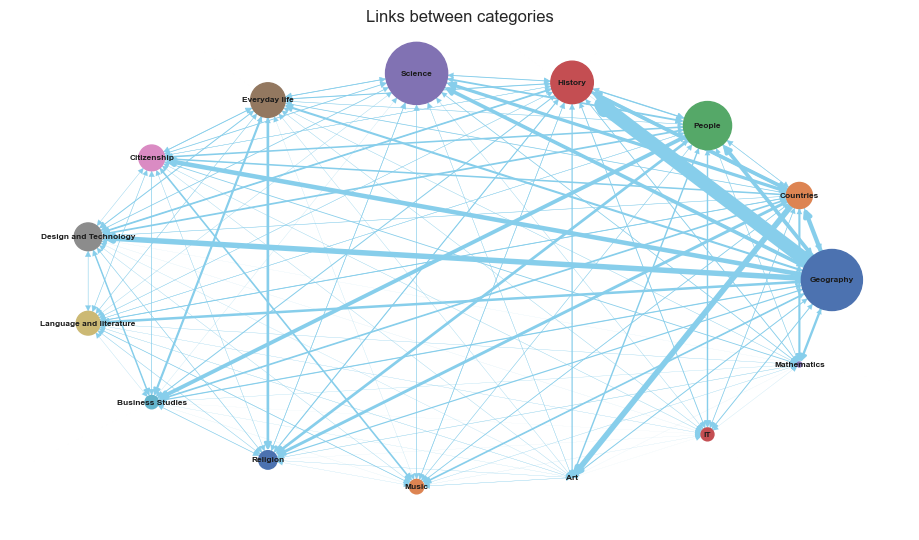

In [ ]:
sum_links_data = get_grouped_category_data(data, includeGeography=True)
create_sum_graph(data, sum_links_data)

The plot shows the following:
- "Geography" has the most outgoing links to other categories with respect to its size. Hence, it indicates that many of the large hubs may coincide in this category. Which we will investigate further in the next section.

- "Countries" also has a lot of outgoing links to other categories with respect to its size. Not too suprising since atricles that are in "Countries" also belongs to the category "Geography". 

With a clear understanding of the structure of the Wikipedia network we are working with, we can now begin our analysis of the Wikispeedia dataset. We start by exploring the notion of hubs, which serve as critical points within the network, guiding users’ navigation and highlighting areas of high connectivity and influence.

## Hubs analysis
In this section, we focus on the analysis of hubs in the Wikispeedia dataset. First, we do an initial analysis of the articles on wikipedia to better understand which articles may serve as hubs.
A hub can be seen as an article that is well connected in the Wikipedia network and can be used to navigate to many other articles. 
To define them properly we focus on four key characteristics:

- Source count (number of outgoing links from the article),
- Target count (number of incoming links to the article),
- Mean shortest path (average distance between the article and others in the network),
- Mean shortest path from others (average distance from other articles to the hub).

These characteristics are loaded into a dataframe which also contains the category of each hub. Since articles can belong to multiple categories, each category is represented by a separate column, and an article receives a value of 1 if it belongs to that category.

In [9]:
# Getting dataframe with data of hub characteristics from hubs_analysis.py
# For all articles: target count, source count, mean shortest path to/from the article to any article in the network and their category(ies)
df_hubs = get_hubs_dataframe(data)

In [10]:
df_hubs.head()

article_names  source_counts  target_counts  \
0      Áedán mac Gabráin             11              0   
1                  Åland             19              0   
2          Édouard Manet             20              0   
3                   Éire              8              0   
4  Óengus I of the Picts             10              0   

   mean_shortest_path_to_article  mean_shortest_path  Art  Business Studies  \
0                            0.0            3.395464    0                 0   
1                            0.0            3.127959    0                 0   
2                            0.0            3.171598    0                 0   
3                            0.0            3.325937    0                 0   
4                            0.0            3.386834    0                 0   

   Citizenship  Countries  Design and Technology  Everyday life  Geography  \
0            0          0                      0              0          0   
1            0          1                      0              0          1   
2            0          0                      0              0          0   
3            0          1                      0              0          1   
4            0          0                      0              0          0   

   History  IT  Language and literature  Mathematics  Music  People  Religion  \
0        1   0                        0            0      0       1         0   
1        0   0                        0            0      0       0         0   
2        0   0                        0            0      0       1         0   
3        0   0                        0            0      0       0         0   
4        1   0                        0            0      0       1         0   

   Science  
0        0  
1        0  
2        0  
3        0  
4        0

In [11]:
#Printing statistics for dataframe
df_hubs[['source_counts', 'target_counts','mean_shortest_path_to_article','mean_shortest_path']].describe()

source_counts  target_counts  mean_shortest_path_to_article  \
count    4604.000000    4604.000000                    4604.000000   
mean       26.038662      26.038662                       2.829412   
std        24.201491      62.746827                       1.170888   
min         0.000000       0.000000                       0.000000   
25%        11.000000       2.000000                       2.626172   
50%        19.000000       8.000000                       2.989640   
75%        33.000000      25.000000                       3.476390   
max       294.000000    1551.000000                       6.866085   

       mean_shortest_path  
count         4604.000000  
mean             3.188769  
std              0.321702  
min              0.000000  
25%              3.025154  
50%              3.179408  
75%              3.344081  
max              5.119852

From the statistics above we see that wikipidia pages have on average the same amount of articles to and from them, however the median is lower than the mean in both cases indicating a skewed distribution of the number of articles to and from wikipedia pages. Lets look closer at the distributions of these.

**Distribution of source and target count for all articles**

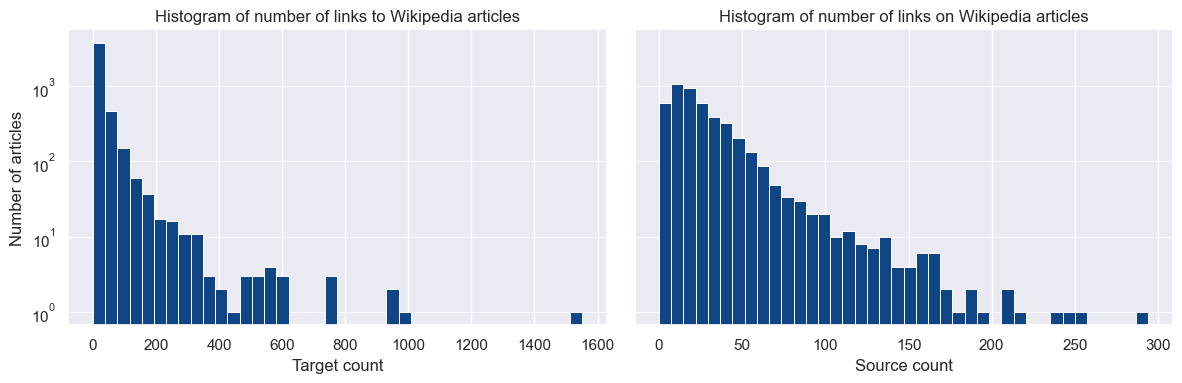

In [12]:
#Calling function to plot distributions from plot_functions.py
plot_two_distributions(df_hubs, "target_counts", "source_counts", 'Histogram of number of links to Wikipedia articles', 
                       'Histogram of number of links on Wikipedia articles','Target count','Number of articles','Source count', 
                       'Number of articles',log_scale = True)

Note that the y-axis of the plot is in log scale. From the distribution of links we can clearly see that there is a variation in the number of links on wikipedia pages and that there are many articles with fewer links to them and some articles have many links to them. 

**Distribution of mean shortest path to and from articles for all articles**

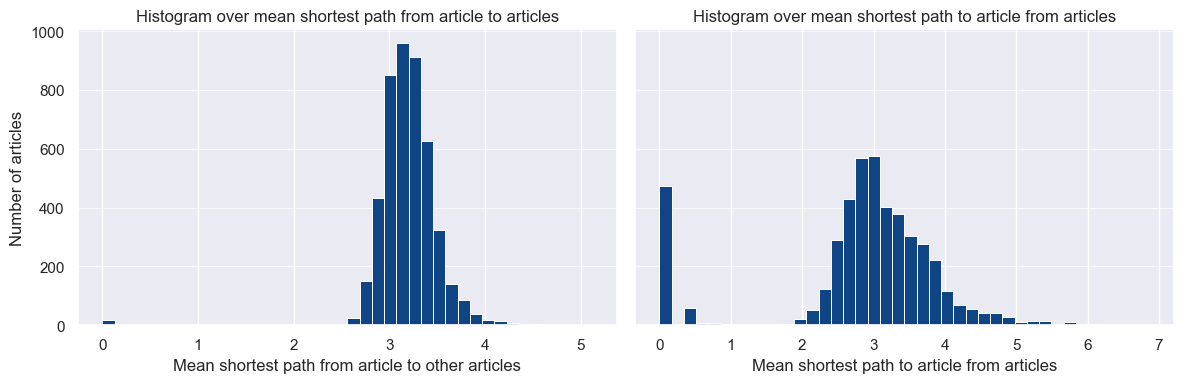

In [13]:
#Calling function to plot distributions from plot_functions.py
plot_two_distributions(df_hubs, "mean_shortest_path", "mean_shortest_path_to_article", 'Histogram over mean shortest path from article to articles', 
                       'Histogram over mean shortest path to article from articles','Mean shortest path from article to other articles',
                       'Number of articles','Mean shortest path to article from articles', 'Number of articles')

In the first plot we see that the distribution of mean shortest path to another article is much more evenly distributed and dense. We can see that there are some articles which are outliers and have a very short mean shortest path. However, this does not mean that they are more connected to other articles in the network since nan mean was used to calculate the mean shortest path. Therefore articles which are not connected to any other article will have a value close to 0.

The mean shortest path to a article is less dense and we can see that there are also some outliers. We can see that some articles have the value 0 for mean shortest path to them meaning these articles are in accessible to players unless they start from this article. 

**Looking at extreme values in distributions**

Here we are looking at the extreme values in the distribution to get an understanding of what articles might be hubs. We are looking at the articles which have the most links to and from them. We are also looking at the ones which have a short mean path to any other article. 

In [14]:
#Calling function in hubs_analysis.py
top_10_article_names_source = get_top_10_largest(df_hubs, 'source_counts', 'Articles with most of links from them:', n = 10)

Articles with most of links from them:
                                  article_names  source_counts
4297                              United States            294
1247               Driving on the left or right            255
2504                          List of countries            244
2503             List of circulating currencies            236
2515                   List of sovereign states            216
128                                      Africa            212
2505  List of countries by system of government            207
2433                                    Lebanon            192
2134                                   Interpol            191
340                                     Armenia            186


In [15]:
#Calling function in hubs_analysis.py
top_10_article_names_target = get_top_10_largest(df_hubs, 'target_counts', 'Articles with most of links to them:', n = 10)

Articles with most of links to them:
         article_names  target_counts
4297     United States           1551
4293    United Kingdom            972
1568            France            959
1433            Europe            933
1385           England            751
4542      World War II            751
1694           Germany            743
2098             India            611
1389  English language            598
2538            London            587


When calculating the mean shortest path to and from an article nan mean was used meaning that if an article is not connected to any other article or very few articles the mean shortest path will be very low. Therefore, these cases are filtered out and will not be considered as having a short path.

In [16]:
min_indices = df_hubs[df_hubs["mean_shortest_path"] < 1].index
print('Number of articles with min distance smaller than one:', len(df_hubs["article_names"].iloc[min_indices]))

Number of articles with min distance smaller than one: 19


In [17]:
#Creating filtered hubs dataframe without articles that are outside of the main wikipedia network
df_hubs_filtered = df_hubs.drop(min_indices).reset_index(drop=True).copy()

#Calling function in hubs_analysis.py
top_10_article_names_shortest_path = get_top_10_smallest(df_hubs_filtered, 'mean_shortest_path', 
                                           'Articles with mean shortest path to other articles after filtering out articles not in the main network:')

Articles with mean shortest path to other articles after filtering out articles not in the main network:
                     article_names  mean_shortest_path
4281                 United States            2.484834
39                    21st century            2.563502
1982          History of the world            2.578792
331                      Argentina            2.586436
24                    19th century            2.596054
4277                United Kingdom            2.606165
1242  Driving on the left or right            2.609467
128                         Africa            2.622935
3951                      Swastika            2.626387
1687                       Germany            2.626880


Similarly, for the mean shortest path to a given article, some articles have very low values, including zero, indicating that they are unreachable to players or mostly unreachable. These articles are filtered out before identifying the top articles with the shortest paths to them, ensuring that the analysis focuses on articles that are more accessible within the Wikipedia network.

In [18]:
#Filtering out inaccesable articles and printing the number of inaccessible articles
min_indices_to = df_hubs_filtered[df_hubs_filtered["mean_shortest_path_to_article"] <= 1].index
print('Number of articles with min distance to:', len(df_hubs_filtered["article_names"].iloc[min_indices_to]))

Number of articles with min distance to: 534


We see that quite a lot of articles are not accessible in the network.

In [19]:
#Printing top 10 articles with shortest path to them
df_hubs_filtered = df_hubs_filtered.drop(min_indices_to)

#Calling function in hubs_analysis.py
top_10_article_names_shortest_path_to  = get_top_10_smallest(df_hubs_filtered, 'mean_shortest_path_to_article', 'Articles with mean shortest path to them from other articles:')

Articles with mean shortest path to them from other articles:
         article_names  mean_shortest_path_to_article
4281     United States                       1.690949
1427            Europe                       1.839258
4277    United Kingdom                       1.843621
1562            France                       1.849291
1687           Germany                       1.904035
4524      World War II                       1.907088
2409             Latin                       1.944166
1383  English language                       1.945038
2091             India                       1.945038
1379           England                       1.951145


#### How many articles are in the top 10?

In [20]:
common_articles_set = top_10_article_names_source & top_10_article_names_target & top_10_article_names_shortest_path & top_10_article_names_shortest_path_to

# Print the common article names
print("Articles present in all three:")
print(common_articles_set)

Articles present in all three:
{'United States'}


We see that only one article is in the top 10 of all the used characteristics of a hub and that article is United States. 

To quantify the interconnectedness or "hubness" of an article, we then turn to PageRank as a key metric.

### PageRank

The PageRank algorithm gives a continuous measure from 0 to 1 of how important an article is in the network by looking at the number of links to that article and the quality of the link. The "quality" of the link refers to how many incoming edges that node (article) has. Therefore, PageRank is an iterative algorithm to rank nodes in a graph network.

However, the traditional PageRank algorithm highly prioritizes incoming edges to a node, with little consideration given to number of outgoing edges. For our purposes, we need to consider both target and source count, to understand articles that are truly cornerstones within the Wikispeedia game. We therefore adjusted the PageRank algorithm to give equal weighting to nodes with a high number of incoming edges and nodes with a higher number of outoing edges.

In [21]:
# call PageRank functions from hubs_analysis.py
df_hubs = calculate_pagerank(data, df_hubs)
df_hubs,G = calculate_outgoing_pagerank(data, df_hubs)
df_hubs, df_filtered_hubs = create_hub_score(df_hubs)

The calculate PageRank function implements the traditional pagerank algorithm on our graph network of articles. It returns the data frame with a new column PageRank score. 

The calculate_outing_paegrank implements the PageRank algorithm with the weights adjusted to give higher value to articles with lots of outgoing links. It returns the df with a new column Outgoing_PageRank score.

The create_hub_score takes the average of these two previous pagerank scores and creates a new column hub_score in df_hubs. Df_filtered_hubs also has this score, but has rows removed with articles with no incoming links. These are filtered out as our later analysis is limited to clicks and actions taken by the user and the only way to access an article without any link to them is to start in this article. Additionally, for our purposes we will mainly use the hub_score as we see it as important to both be able to access an article and navigate from it. 

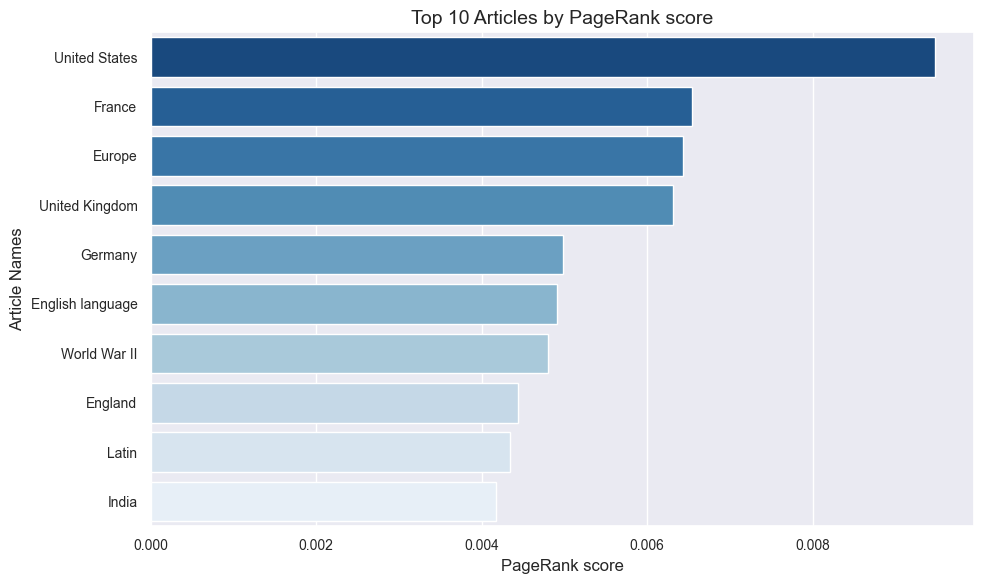

In [22]:
# Top 10 hubs visualization, calling function from plot_functions.py
plot_top10_pagerank(df_hubs)

PageRank values represent the probability that a random internet surfer will land on that node/page. So the sum of the pagerank value for all the nodes is 1. As expected from the previous analysis the article with the top PageRank score is United States. 

### Looking at correlation between the characteristics and the PageRank score
As another sanity check we want to look at the correlation between the continuous measure of the hubness of the article with the other iidentified characteristics of a hub.

In [23]:
cols = ['source_counts','target_counts','mean_shortest_path_to_article','mean_shortest_path', 'hub_score']
p_values , _ = calculate_correlation(df_filtered_hubs, cols)
print('P-values for the bottom row of the correlation matrix')
print(np.round(p_values[-1, :], 2))

P-values for the bottom row of the correlation matrix
[0. 0. 0. 0. 0.]


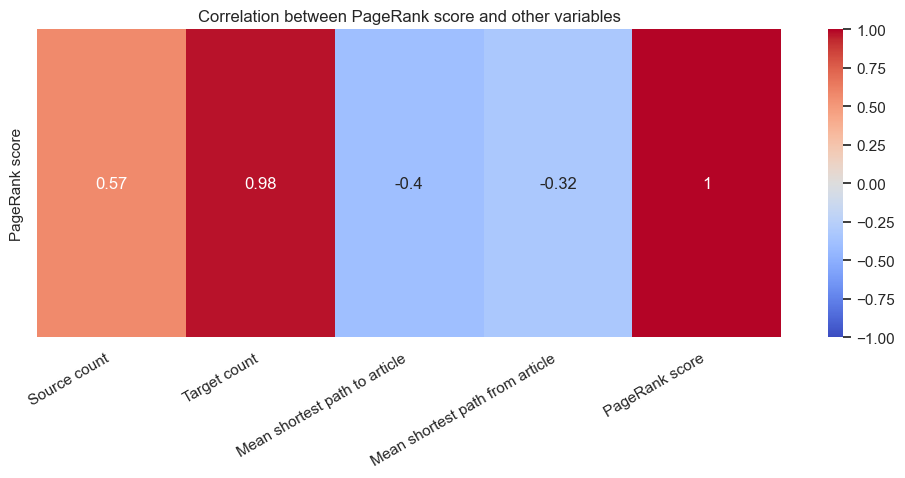

In [24]:
#Plotting correlation matrix from plot_functions.py
get_correlation_matrix_row(df_filtered_hubs, cols)

Highly correlated with target counts, and also correlated with source counts. The metric is also negatively correlated with mean shortest path and mean shortest path to article, which means that the higher the hub score the shorter the path to other articles and the shorter the path to the article. Since all p-values are significant it means that there is a correlation between the hub score metric created and the other characteristics of the hubs. Which is what we want!

#### Analysing the hub score and categories

To understand which categories play a central role in the network, we analyze also the total PageRank score for each category.


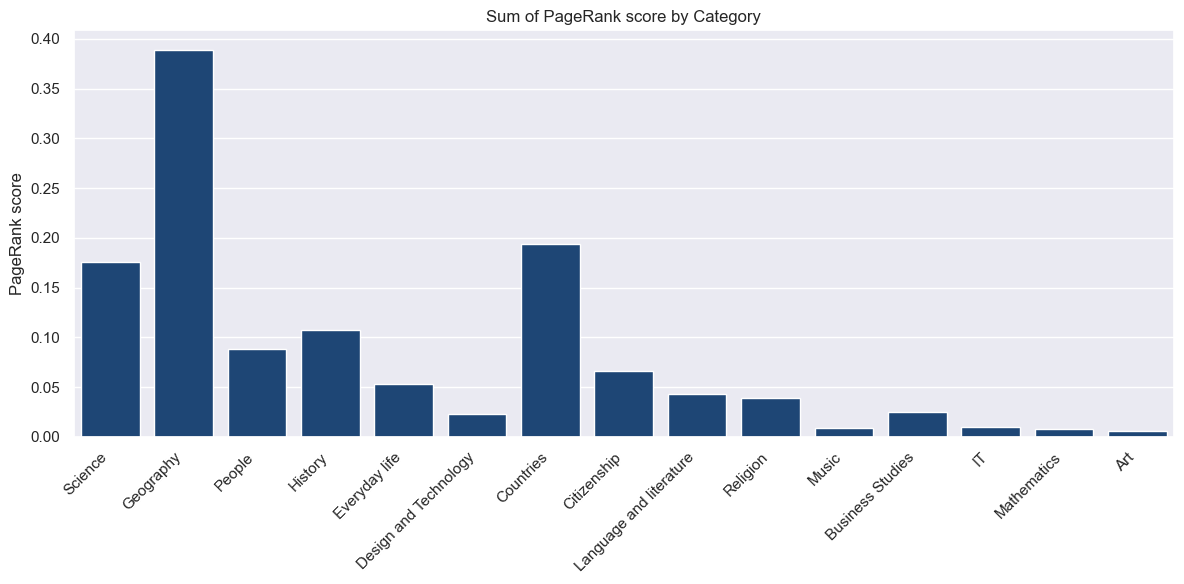

In [25]:
barplot_page_score_by_category(df_filtered_hubs)

The plot is arranged in the order of the number of articles in each category. Interestingly, we can see that the category with the highest page rank score is Geography then Countries followed by Science. This is interesting as this is different from the number of articles in each of these categories. To get a better understanding of the hubscore we now normalize the score by the number of articles in each category.

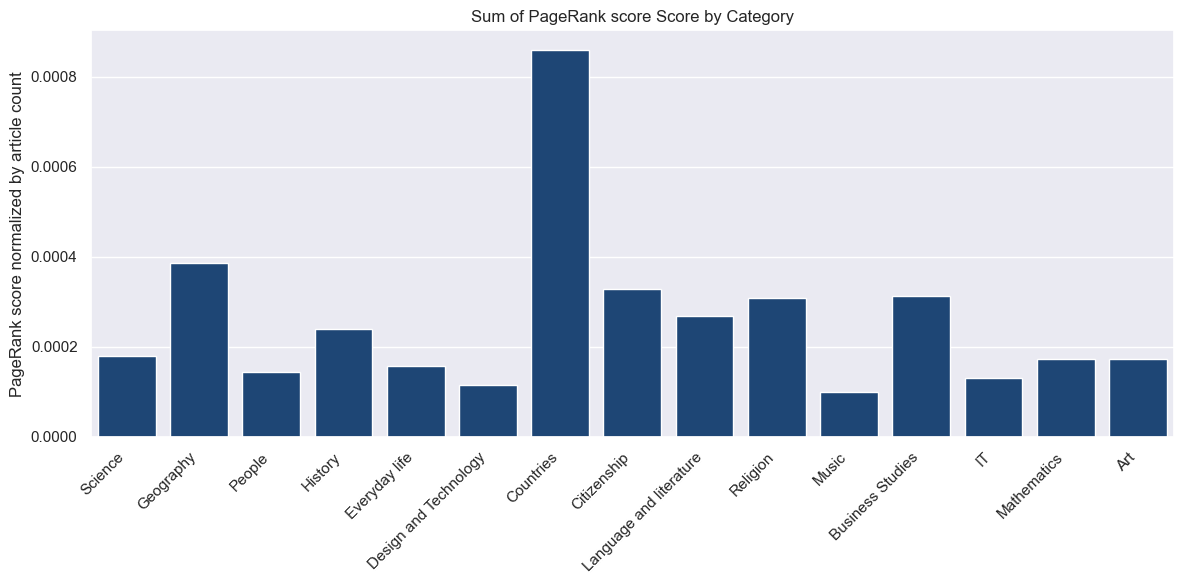

In [26]:
normalized_hubscore_category = barplot_page_score_by_category_normalized(df_filtered_hubs)

In [27]:
#Printing average hubscore for each category
sorted_normalized_hubscore_row = normalized_hubscore_category.loc["PageRank score"].sort_values(ascending=False)
print(sorted_normalized_hubscore_row)

Countries                  0.000860
Geography                  0.000387
Citizenship                0.000329
Business Studies           0.000313
Religion                   0.000309
Language and literature    0.000268
History                    0.000241
Science                    0.000179
Art                        0.000174
Mathematics                0.000172
Everyday life              0.000157
People                     0.000145
IT                         0.000130
Design and Technology      0.000115
Music                      0.000099
Name: PageRank score, dtype: float64


From looking at the average hubscore we can see that countries has a high value, which makes sense as of the top 10 articles with the highest hubscore countries make up 5 of these indicating that other countries might have high values as well. 

Finally we can represent the whole Wikipedia network with the hub score of each article.

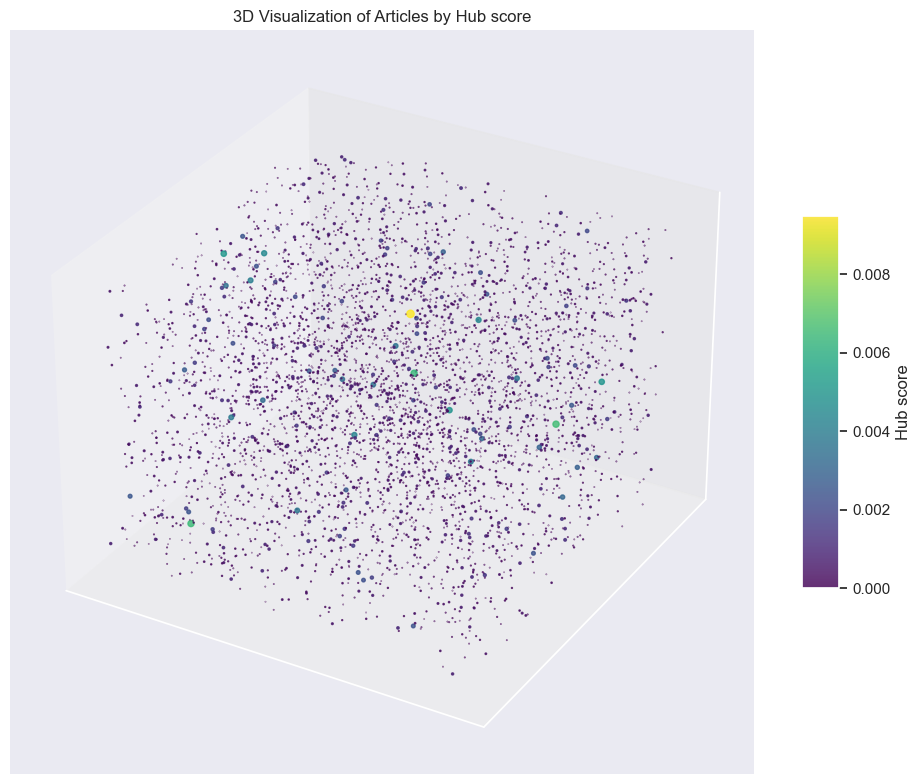

In [28]:
# Visualize all articles in 3d space, with size based on hub score
#Interactive plot marked out
#hub_network(df_filtered_hubs, G)
static_hub_3d(df_filtered_hubs, G)


From this, we can get an idea of just how large the network is, and how there are not many articles with notable PageRank values, meaning they are not very well connected in the network. 

Having identified key hubs and their PageRank scores, we now turn our focus to understanding user navigation patterns.



## User navigation patterns

In our analysis of the Wikispeedia dataset, we previously identified key "hubs" in the network. These hubs often correspond to culturally significant anchor points, reflecting the structure of modern knowledge. However, the prominence of an article as a hub does not necessarily indicate its alignment with areas of widely shared knowledge. Instead, to better understand the common knowledge shared among users, we must delve into the paths players take during their games.

### Analysis of the Similarity Between Games

To identify a "common knowledge" shared among the players of the game, we must demonstrate that players exhibit similar behavior during their games. To achieve this, we need to examine how different players approach the same game (with the same starting point and target) and assess the degree of similarity in the path they take to navigate. To do so we will look at the finished paths of the players and compare them to each other for same games.

In [29]:
games = get_games(data)
print("Number of games: ", len(games))
print("Number of games with more than 10 participants: ", games[games["nb_games"] > 10].shape[0])
games.sort_values("nb_games", ascending=False).head(10)

100%|██████████| 51318/51318 [01:49<00:00, 468.06it/s]

Number of games:  28718
Number of games with more than 10 participants:  126


start                end  nb_games
5526   Asteroid             Viking      1043
6158      Brain          Telephone      1040
27239   Theatre              Zebra       905
9219    Pyramid               Bean       642
466      Batman               Wood       148
537        Bird  Great white shark       138
464      Batman      The Holocaust       119
536        Bird       Adolf Hitler       107
507        Beer                Sun        99
484      Batman             Banana        69

We can see that among the finished paths of the players, there are many games but only a few of them have more than 10 players. To gain a clearer understanding of the similarity between players, we will focus on these games with larger player participation.

A first idea is to create a **distance between two paths** in the wiki-graph. If two players, playing the same game, have similar paths (i.e., a short distance between their paths), we can assume that they behave similarly. Conversely, if the paths are different (i.e., a long distance between them), we can infer that the players' behaviors differ.

There are various ways to measure the similarity between two paths, we decided to implement two distances that give different insights on the data :
- **Jacard distance** : the number of common nodes divided by the number of nodes in the union of the two paths
- **Shortest Path-based Distance (SP)**: $$d(p_1,p_2)= \max_i (\min_j SP(p_1[i],p_2[j]))$$ where $p_1$ and $p_2$ are the two paths to compare and $SP(p_1[i],p_2[j])$ is the length of the shortest path from $p_1[i]$ to $p_2[j]$. Note that this distance is not symmetric, but we can make it symmetric by taking the maximum distance of the two directions. This distance can be interpreted as the maximum number of clicks separating the two paths at any point during the navigation.
- **Semantic distance** : we can compute a semantic distance with a pretrained Bert model. By computing the embedding of the "sentence" made of the path, we can compute the cosine similarity between the two paths. This distance can be interpreted as the semantic similarity between the two paths.

We can analyse the similarity between paths taken by players for each game with more than 10 players we have. Here we present the results for one game starting from "Calculus" and ending at "Paul McCartney".

Game from  Calculus  to  Paul McCartney


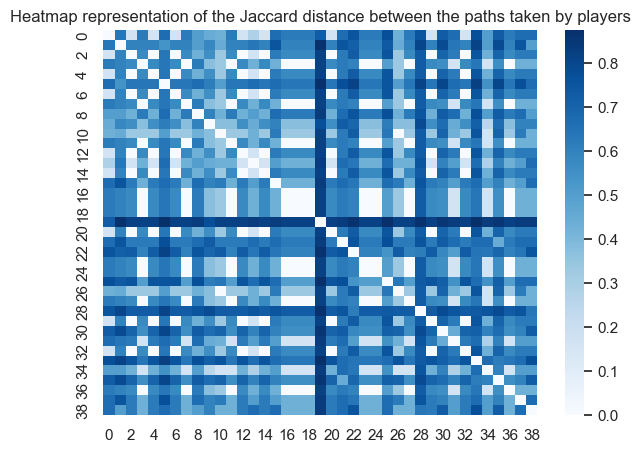

Mean distance for game from  Calculus  to  Paul McCartney  :  0.5025753980070026
Game from  Calculus  to  Paul McCartney


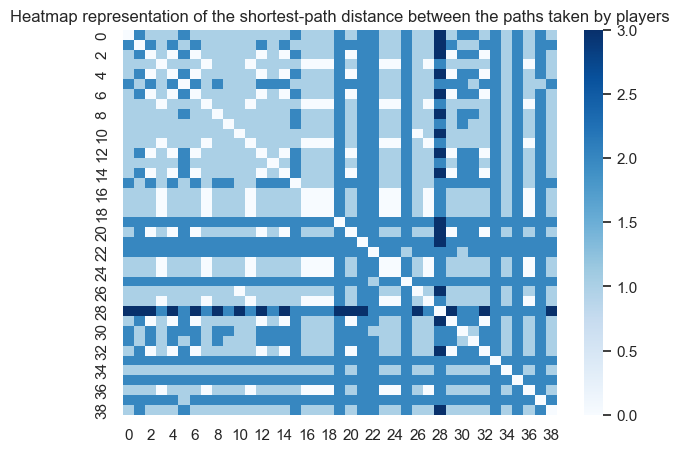

Mean distance for game from  Calculus  to  Paul McCartney  :  1.3372781065088757
Game from  Calculus  to  Paul McCartney


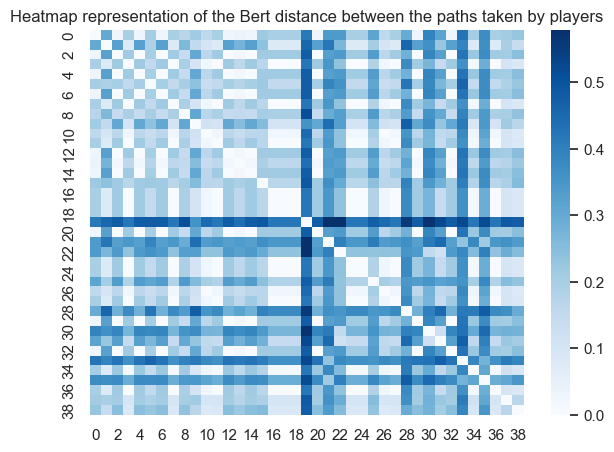

Mean distance for game from  Calculus  to  Paul McCartney  :  0.21281671720220485


In [30]:
start = "Calculus"
end = "Paul McCartney"

plot_sim_matrices(data,[start],[end],distance = distance_Jaccard, title = "Heatmap representation of the Jaccard distance between the paths taken by players")
plot_sim_matrices(data,[start],[end],distance = distance_matrix, title = "Heatmap representation of the shortest-path distance between the paths taken by players")
plot_sim_matrices(data,[start],[end],distance = distance_Bert, title = "Heatmap representation of the Bert distance between the paths taken by players",is_Bert=True)

For the game "Calculus" to "Paul McCartney", the results can be interpreted as follows :
- The average Jacard distance between two paths is 0.5. This means that on average,  two players share 50% of the articles they pass through.
- The average shortest path distance is 1.3. This means that on average, two players are at most 1.3 clicks away from each other during this game. 
- The average semantic distance is 0.2. This means shows that on average players are semantically close to each other.

This shows an example for one specific game, where we see that players tend to take similar paths. We can also compute these distances for all games and see if this is a general trend. Here we present the histogram showing the distribution of mean semantic distance between two paths for all games. As a comparison point we also show the mean distance for two random generated paths. 

100%|██████████| 100/100 [02:22<00:00,  1.43s/it]


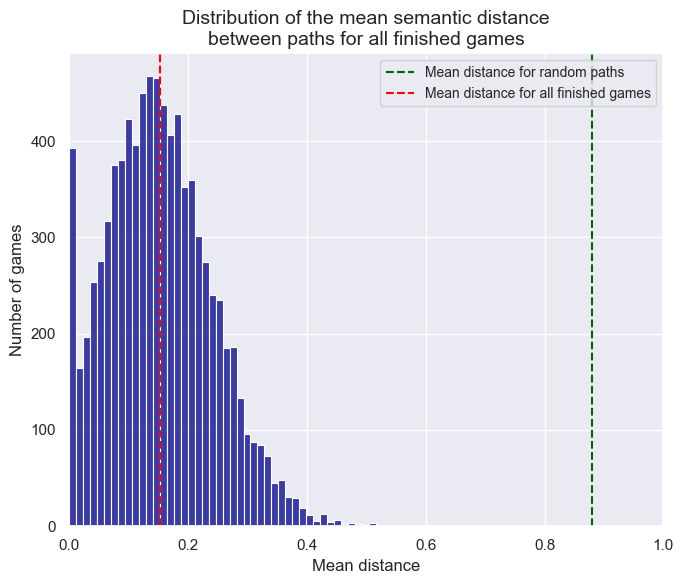

In [31]:
plot_sim_distrib(data,games)

As the histogram demonstrates, this pattern holds true across all completed games in our dataset, showing a global mean distance of 0.15 between two finished paths for the same game, against 0.8 for random paths. These results give us a good indication of how similarly the players behave. From this, we can infer that they tend to take similar paths, likely due to shared knowledge or common strategies.

Another approach is to analyze the **similarity between the first clicked articles of two players**. For this analysis, we focus on a game with more than 10 players, specifically examining the similarity between the first articles each player visits. While we will continue analyzing the game from "Calculus" to "Paul McCartney" in this case, this approach can be applied to any game with a sufficient number of players.

This analysis can provide valuable insight into whether players' initial approach to the game and their understanding of the target article are similar or not.

To measure this similarity, we compute the mean distance between the first articles clicked by two players, using the shortest path distance.



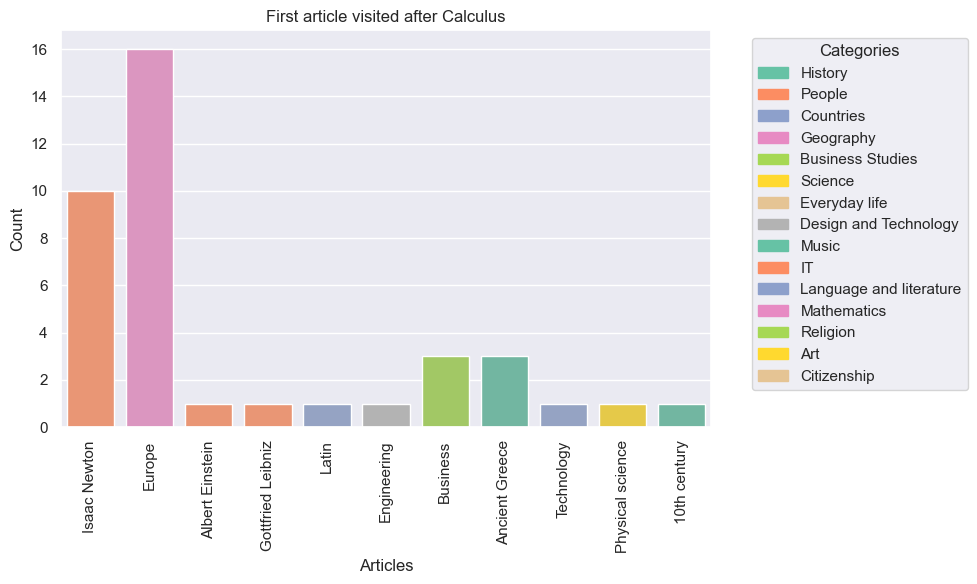

The mean distance between two first articles visited after Calculus by different players is:  1.1443994601889338


In [32]:
start = "Calculus"
end = "Paul McCartney"
plot_first_article_bar_chart(data,start, end)
print("The mean distance between two first articles visited after Calculus by different players is: ", distance_first_article(data, start, end))

These results can be interpreted as follows:

- The vast majority of players tend to click on either "Europe" or "Isaac Newton" as their first article, indicating that most players behave similarly.

- There is also a noticeable similarity in the categories of the first articles clicked by players. For example, most players start by clicking on articles related to "People" or "Geography."

- The average distance (as shortest path distance) between the first articles clicked by two players is 1.5, suggesting that the first clicked articles are often quite close to each other. For instance, "Isaac Newton," "Physical Science," and "Albert Einstein" are examples of closely related first articles.


We can then compute this average distance for all games with more than 10 players (and fewer than 100 players to manage computational complexity) and analyze the results.

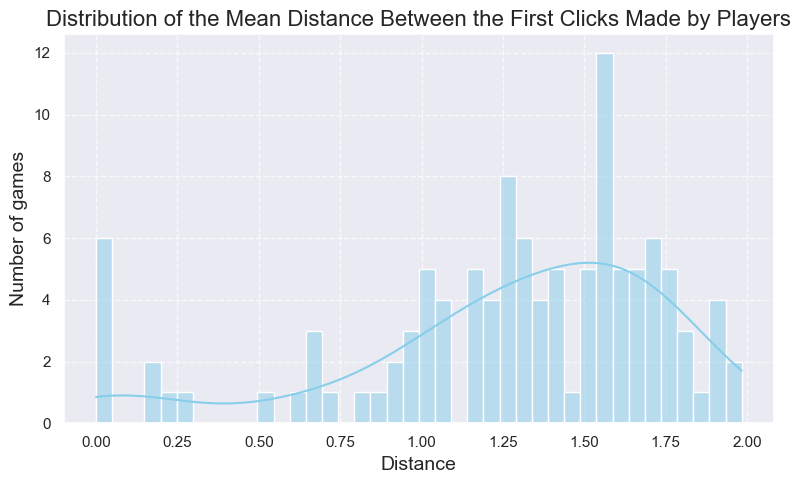

In [33]:
games_valid = games[(games["nb_games"] > 10)& (games["nb_games"] < 100)].copy()
games_valid["dist_first_article"] = games_valid.apply(
    lambda x: distance_first_article(data, x["start"], x["end"]), axis=1
)
plt.figure(figsize=(8, 5))
sns.histplot(games_valid["dist_first_article"], bins=40, kde=True, color="skyblue")

plt.title("Distribution of the Mean Distance Between the First Clicks Made by Players", fontsize=16)
plt.xlabel("Distance", fontsize=14)
plt.ylabel("Number of games", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We see that on average for all games , the average distance between the first articles clicked by two players is  around 1.5. This indicates that players tend to start their games with similar articles, likely due to shared knowledge or common strategies.

### Analysis of players paths

To analyze players' navigation habits, key questions arise: which articles are visited most often? Which categories are explored? What links are clicked on the most? Since players tend to select articles they are familiar with or knowledgeable about to reach their target, examining these choices offers valuable insights into shared knowledge.

To address this, we identify the top 10 most visited articles, the most frequently clicked links, and the frequency of exploration for each category across all games.

Processing finished paths: 100%|██████████| 51318/51318 [00:00<00:00, 638442.69it/s]


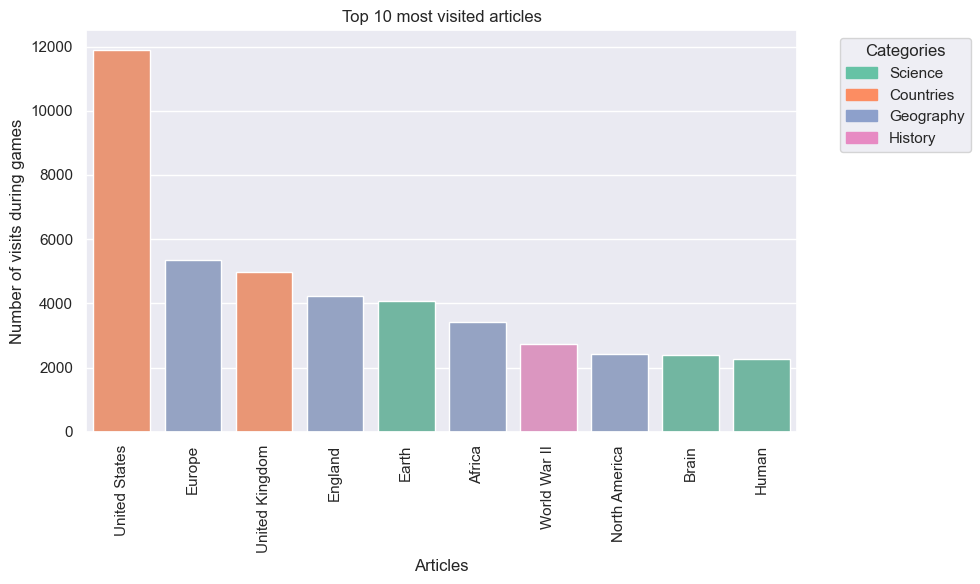

In [36]:
plot_top10_articles(data)

The top 10 most visited articles align closely with the network’s major hubs, representing globally recognized topics. This suggests that players have a good knowledge of these concepts and their connections. Notably, only four categories are represented in the top 10, indicating areas where players feel most confident and knowledgeable.

Processing finished paths: 100%|██████████| 51318/51318 [00:00<00:00, 540935.97it/s]


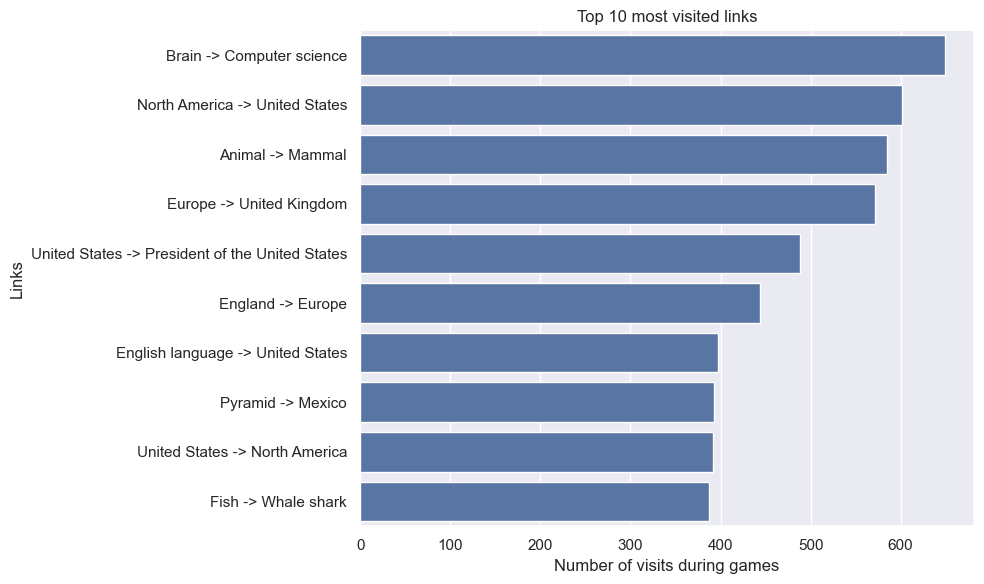

In [37]:
plot_top10_links(data)

The top 10 most clicked links highlight common associations widely understood by players. As with the most visited articles, these associations are predominantly related to geography and science. This reveals taxonomies that are commonly understood and recognized, such as biodiversity taxonomy (e.g., mammals being animals) and geographic taxonomy (e.g., the UK being part of Europe). These patterns reflect a shared understanding of fundamental classifications that guide players' navigation choices.

Processing finished paths: 100%|██████████| 51318/51318 [01:28<00:00, 576.80it/s]


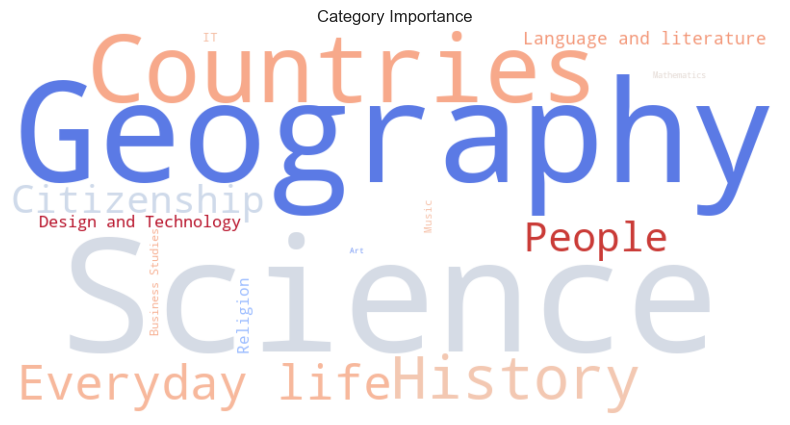

In [38]:
fig_top_cat(data)

The word cloud above visualizes the frequency of exploration for each category across all games, with the size of each category proportional to the number of visits it received, normalized by the number of articles within that category. Consistent with earlier observations, the most frequently explored categories are Science, Geography, Countries, and History, highlighting players' stronger knowledge in these domains.Additionally, Everyday Life appears to be another category that players tend to visit more often. In contrast, less visited categories like Mathematics or Art may point to areas where players might have comparatively less familiarity.

We can also look at the links taken by players to navigate through the network and across the different categories. The graph below shows the trans categorical navigation behaviour (i.e. the number of clicks navigating to another category). The thickness of the edges is proportional to the number of clicks made by users between the categories and the size of the nodes is proportional to the number of articles in the category.



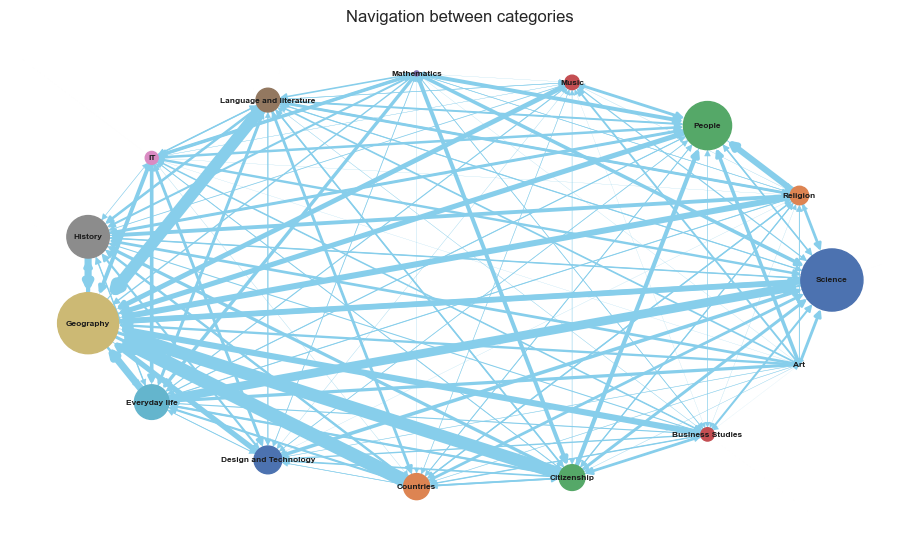

In [ ]:
from src.navigation_analysis import *
sum_nav_data = get_category_navigation_matrix(data)
create_sum_graph(data, sum_nav_data, "Navigation between categories")

It looks like "navigation highways" have been established. Despite a similar amount of articles, users navigate much more via "Geography" than science, which is likely because "Geography" is better connected to other categories as can be seen at the number of links in the previous graph. Further patterns can be analyzed from this, such as that users tend to navigate from "Business Studies" to "Countries" via "Geography" and not directly despite the number of links.

To better understand whether players have knowledge of a particular category, it is also useful to examine the success rate of games starting from a given category and reaching a target category. This can reveal how confident players are when navigating between different topics.
First we can have a look at the distribution of sucess rate over all games where there exist both finished and unfinished paths:

100%|██████████| 24875/24875 [00:34<00:00, 714.94it/s]


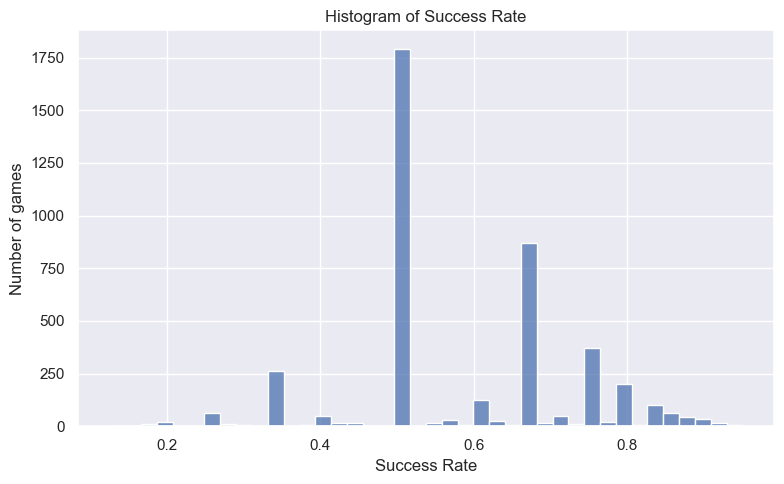

In [39]:
games_unfinished = get_games_unfinished(data)
games_unfinished = success_rate(games_unfinished,games)
games_unfinished_filtered = games_unfinished[games_unfinished["success_rate"].notna()]
plt.figure(figsize=(8, 5))
sns.histplot(games_unfinished_filtered["success_rate"], bins=40)

plt.title("Histogram of Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Number of games")

plt.tight_layout()
plt.show()

We observe that most games have a success rate around 0.5. However, we can see that some games have very high (resp very low) success rates, and it would be interesting to analyze them as they may reveal patterns of common knowledge (or lack ) among players.
If we now look more closely at the success rate depending on the starting point and target point categories, se have the following plot: 

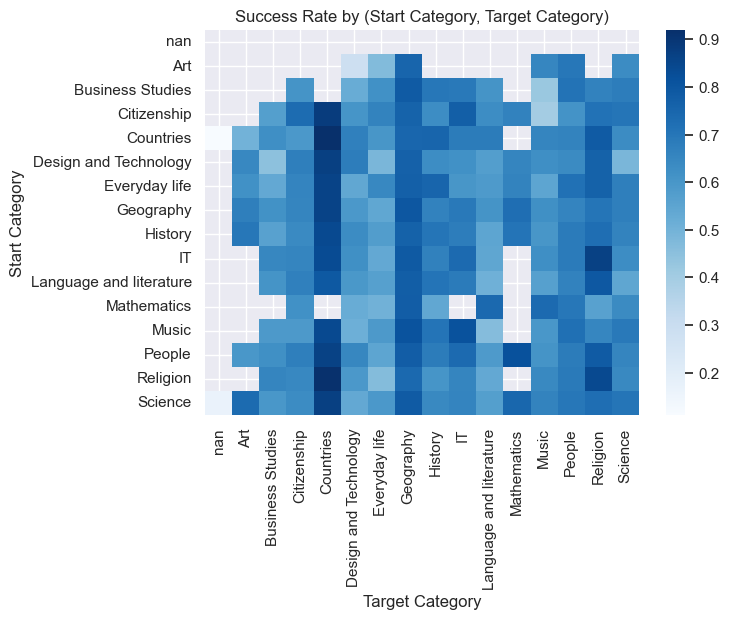

In [40]:
plot_success_rate_heatmap(data)

The heatmap above illustrates players' confidence in navigating between different categories. Missing success rates occur due to insufficient data, with too few games played between certain category pairs. The heatmap confirms that players have strong knowledge of countries and geography, as indicated by higher success rates for games targeting articles related to these topics. Surprisingly, we also observe high success rates for certain category pairs, such as IT to Music or Mathematics to People. Additionally, games targeting Religion articles tend to show higher success rates, suggesting new common associations within players' knowledge.

### Analysis of unfinished paths

To gain a deeper understanding of the common knowledge shared by players, it is crucial to examine the unfinished games as well. These games provide valuable insights into player behavior, especially by highlighting areas where knowledge gaps are most pronounced.

We begin by analyzing the most frequently unfinished games:

In [41]:
games_unfinished.sort_values("nb_games",ascending =False).head()

start     target  nb_games success_rate
1578     Brain  Telephone      1004     0.508806
1580   Pyramid       Bean       944     0.404792
1577   Theatre      Zebra       872     0.509285
1594  Asteroid     Viking       727     0.589266
6772    Batman       Wood        75     0.663677

Analyzing successful paths provides valuable insights into shared knowledge, but exploring unfinished paths can reveal critical information about knowledge gaps. By examining where players stop and how close they are to the target, we can pinpoint areas where their knowledge is limited. One key aspect of analyzing these unfinished paths is identifying the specific stopping points for the players.


In [42]:
abandon = get_abandon_point(data)
abandon.sort_values("nb_games",ascending =False).head()

100%|██████████| 24875/24875 [00:10<00:00, 2463.15it/s]


abandon_point  nb_games
66    United States       660
97   United Kingdom       299
75          England       285
801           Brain       278
233         Theatre       202

Interestingly, the most frequent stopping points tend to be major hubs (e.g., the United States, the United Kingdom), raising the question of why players often stop at these locations. To explore this further, we can calculate two metrics: the semantic distance between the stopping point and the target, and the number of clicks needed to reach the target from the stopping point (based on the shortest path distance). 

From these metrics, we can formulate the following assumptions:

- **Close to Target**: If the stopping point is within a small semantic distance (e.g., < 0.1) or a short number of clicks (e.g., ≤ 1 click) from the target, the player may have considered the target effectively reached.
- **Dead-End Articles**: If the stopping point has fewer than 5 outgoing links, the article might be considered a dead-end, leaving the player with no viable options to continue.
- **Distant from Target**: If the stopping point is at a high semantic distance from the target, it may indicate that the player abandoned the path due to the perceived irrelevance or difficulty of the subject.

In [64]:
get_reason_abandon(data)

100%|██████████| 24875/24875 [01:31<00:00, 270.63it/s]


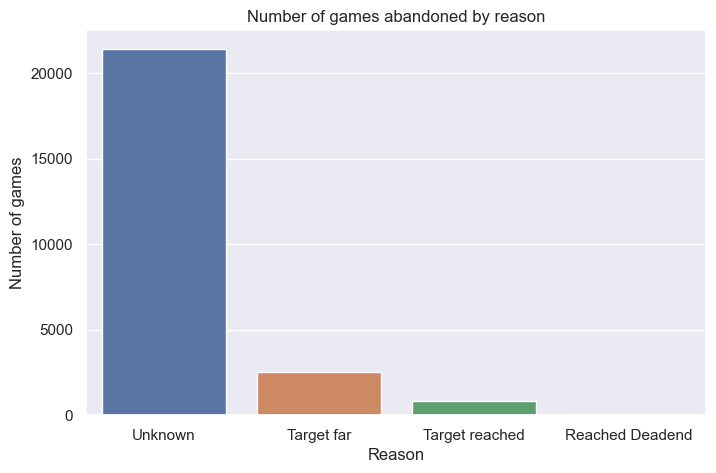

In [65]:
plt.figure(figsize=(8, 5))

sns.barplot(x = data.paths_unfinished["abandon_reason"].value_counts().index, y = data.paths_unfinished["abandon_reason"].value_counts().values,hue = data.paths_unfinished["abandon_reason"].value_counts().index)
plt.title("Number of games abandoned by reason")
plt.xlabel("Reason")
plt.ylabel("Number of games")
plt.show()

The plot above show the distribution of abandon reasons when they can be inferred from previous assumptions (which is not always the case). We observe that most games seems to terminate because the player reach a point where the target is semantically too far, which would mean that the player does not know how to reach the target from the current article. However if the semantic distance is high it does not mean that there are no short paths from the current article to the target. To understand this better we can look at the distribution of the shortest path distance between the stopping point and the target (number of clicks missing to reach the target from the stopping point), as well as the distribution of the semantic distance between the stopping point and the target.

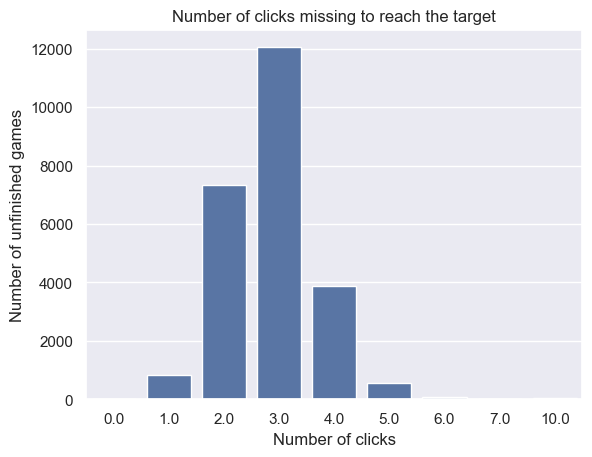

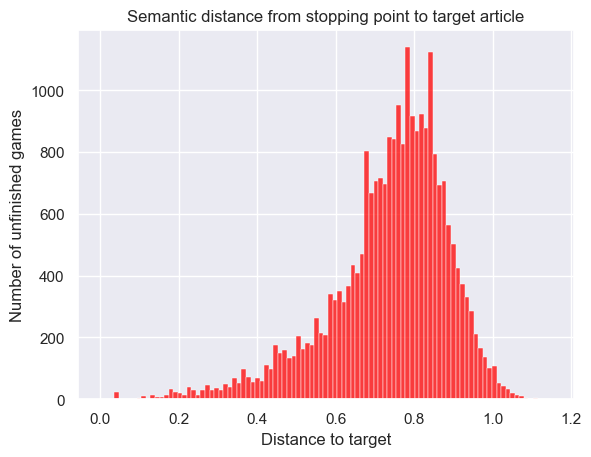

In [45]:
fig_to_target(data)

These plots show that while most of the games relatively semantically far (distance around 0.8), the number of clicks missing to reach the target from the stopping point is relatively low (around 3). This indicates that players often stop at articles that are close to the target in terms of clicks, but semantically far. This could be due to the player not knowing how to reach the target from the current article, which might indicate a knowledge gap. One example from the data involves the target "Milk," where the player stops at "Louis Pasteur," just two clicks away (Louis Pasteur → pasteurization → milk). This suggests that the player may not be aware of the connection between pasteurization and milk.

We can further analyze these unfinished games where players are two clicks away from the target by examining the categories of their stopping points and the target categories. To identify patterns in knowledge gaps, we define a "commonly unknown connection" as one where at least 10 players stopped at the same point while attempting to reach the same target. The following plot highlights which categories are most frequently associated with these "commonly unkown connections".

100%|██████████| 24875/24875 [00:00<00:00, 102361.62it/s]


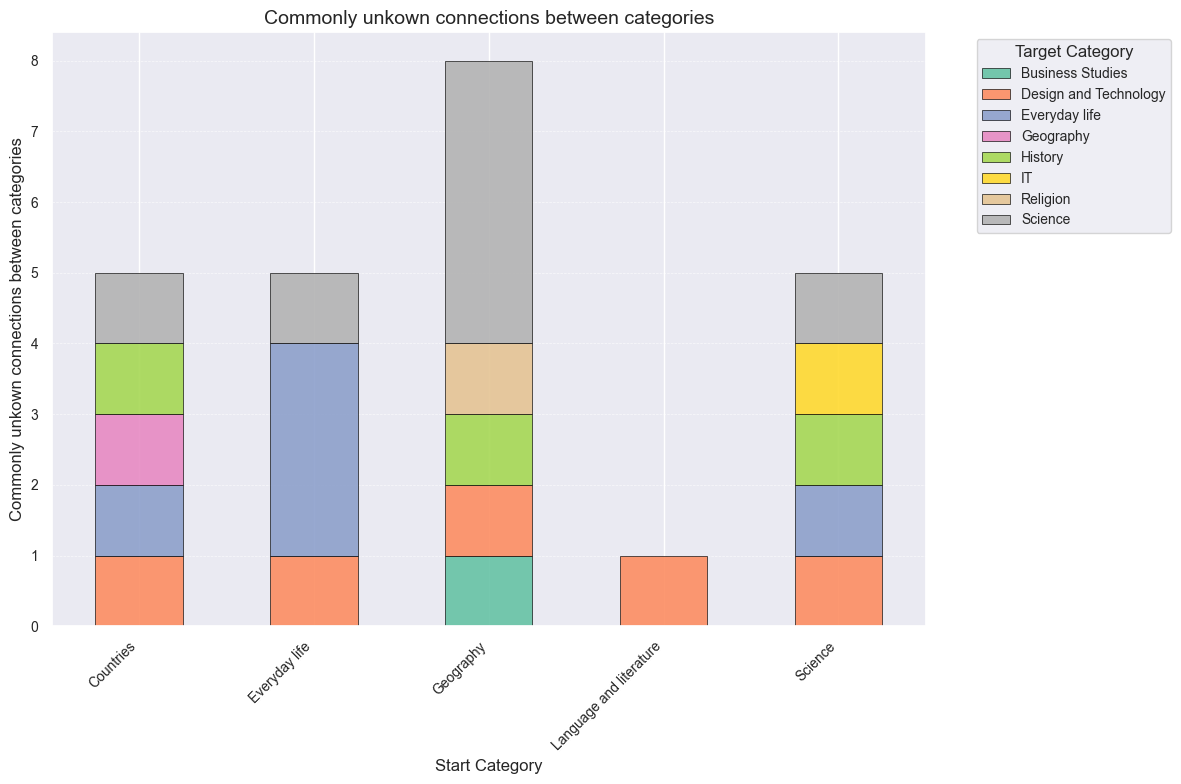

In [ ]:
bar_plot_connections(data)

Interestingly, we observe that some categories, such as Science and Geography, which were previously identified as "well-known," appear here as well. This suggests that while players may have more familiarity with these broader categories, they still lack detailed knowledge of specific subtopics within them—much like how even well-known subjects like Geography may not be fully understood in all their depth. Additionally, since categories like Geography and Science are highly represented in the Wikipedia network, their prominence here is normal. As anticipated, the diagram also includes categories labeled as less familiar, such as Everyday Life and Design and Technology.

In conclusion, the paths taken by players provide valuable insights into common knowledge: they reveal the categories where players have the most familiarity, the links and associations they commonly understand, as well as the connections they often fail to recognize. These findings help us better understand the collective knowledge landscape of the players.
However, it is essential to interpret these results with caution, as they are heavily influenced by the types of games played. The starting and target categories significantly impact the patterns observed, and an unequal distribution of game types could skew the conclusions. Future analyses should aim to account for this bias to ensure a more comprehensive understanding of shared and missing knowledge.

# Evidence for Common Knowledge and Hub Influence

The analyses presented in the previous sections have provided valuable insights into user navigation patterns and the structure of the Wikispeedia network. In the first section, we identified hubs—central nodes that play a crucial role in the network’s topology—while the second section examined user navigation patterns. The findings from these parts suggest the presence of potential common knowledge or knowledge gaps, though their interpretation requires careful consideration. Specifically, while some of these results may reflect existing common knowledge, several factors—particularly the network structure and the prevalence of hubs—could also contribute to the observed patterns. In other words, the concentration of paths around hubs may limit users’ ability to explore diverse pathways, potentially leading to biased or hub-centered conclusions. In this third section, we aim to further investigate the following question: is it possible, despite these hub-centered dynamics, to identify genuine "knowledge" or knowledge gaps, or are the observed results primarily driven by the network structure and user behavior that favors hub-centered navigation?

To try and answer this question, we first need to understand how bif of a role do hub play in the users games. To do so we can look at the percentage of time people visit hubs in their games along paths, and conmpare this to the percentage of time shortest paths go through hubs along the way. 
This can be visualized in the following plot, note that in this approach we use a binary definition for hubs, where an article is considered a hub if it is in the top 10% of the hub score.

In [73]:
finished_hub_positions, unfinished_hub_positions, shortest_hub_positions = get_hub_positions(data, df_hubs)

4604 hubs found 414


/Users/madeleine/Desktop/ada-2024-project-adaventure/src/hubs_frequency.py:47: RuntimeWarning:

invalid value encountered in divide

/Users/madeleine/Desktop/ada-2024-project-adaventure/src/hubs_frequency.py:48: RuntimeWarning:

invalid value encountered in divide

/Users/madeleine/Desktop/ada-2024-project-adaventure/src/hubs_frequency.py:49: RuntimeWarning:

invalid value encountered in divide



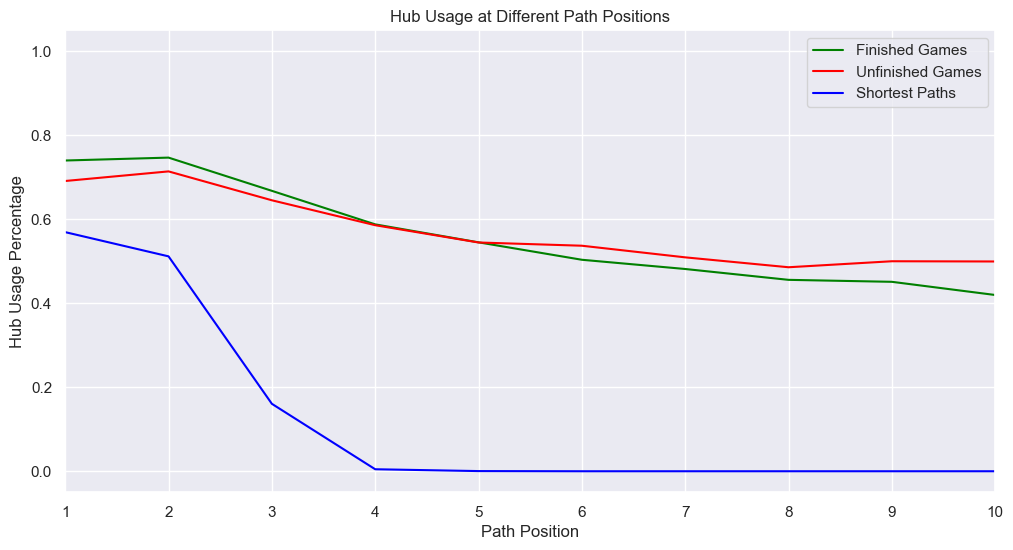

In [72]:
plot_hub_positions(df_hubs, finished_hub_positions, unfinished_hub_positions, shortest_hub_positions)

This plot reveals that in 50% of puzzles, the optimal strategy is to navigate to one of the top 10% most connected hubs with the first click. Most players tend to use these top hubs in their initial steps. Notably, successful players are more likely to utilize hubs within their first three steps compared to unsuccessful players, suggesting that early use of hubs improves navigation success. However, this observation introduces a potential bias to our previous results. While it may demonstrate that players are familiar with the topics associated with these top 10% hubs (e.g., well-known topics like "USA"), the reliance on hubs could obscure the true knowledge gaps. Articles that are highly visited may not necessarily be accessed because they are the most informative, but rather because they are hubs that are highly accessible and central to the network. 

To try and overcome this bias we visualize articles pagerank score against the total number of clicks it has recieved by the players. The goal is to see trends in what articles tends towards the different extremes i.e which articles with a high hub score are not used by players well and what non hubs are often used by players. Since how often players use articles also depends on how often a link is availible to players, the y-axis has been normalised by the percentage of articles that has a link to the article in question. In addition, to make it easier to detect outliers, a line is plotted at the mean of both axises.



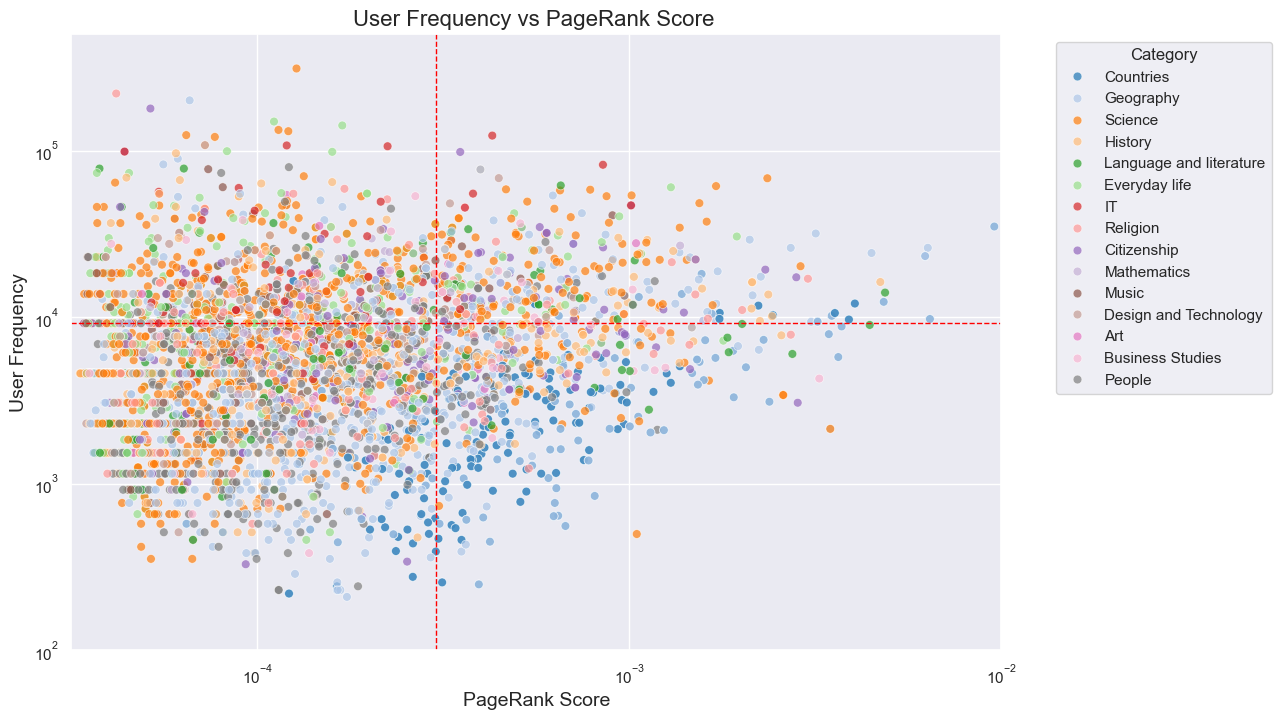

In [52]:
freVpr = get_pageVSfreq_data(data, df_filtered_hubs)
# plot_pageVSfreq(freVpr, category=None) # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category=None)

Due to the fact that most categories are distributed across all quadrants, the categories of greatest interest are those that exhibit a tendency toward specific quadrants or display larger outliers compared to others. The quadrants of interest are the upper left and lower right: The upper left quadrant contains articles that, on average, are less connected but are still highly selected by players in terms of their frequency of use. Assuming that players are more likely to click on articles they have prior knowledge of, these articles may represent common knowledge more than others since they are not as effective in reaching the target article but are still frequently chosen. In contrast, the lower right quadrant consists of articles that may represent lesser-known concepts, as they are more connected but less frequently used.

Due to the scatter of Geography, it constitutes a large portion of both highly connected hubs and frequently used articles. However, it also accounts for the majority of the more connected articles that are rarely used. More specifically, countries primarily fall into this group, shifting the category toward the lower right quadrant, distinct from general geographical knowledge. Science is also highly scattered, with many significant outliers appearing in both the upper left and lower right quadrants.

Everyday life and IT show some articles that are used more than average by users but, on average, are less connected than other articles. IT is particularly notable due to its articles being heavily shifted toward the upper left quadrant, with no articles appearing in the lower right quadrant.

These categories (except for IT due to limited data) will be further examined in the upcoming plots by analyzing trends in the second category of the articles, and starting with the following plot that examines the Geography category. 

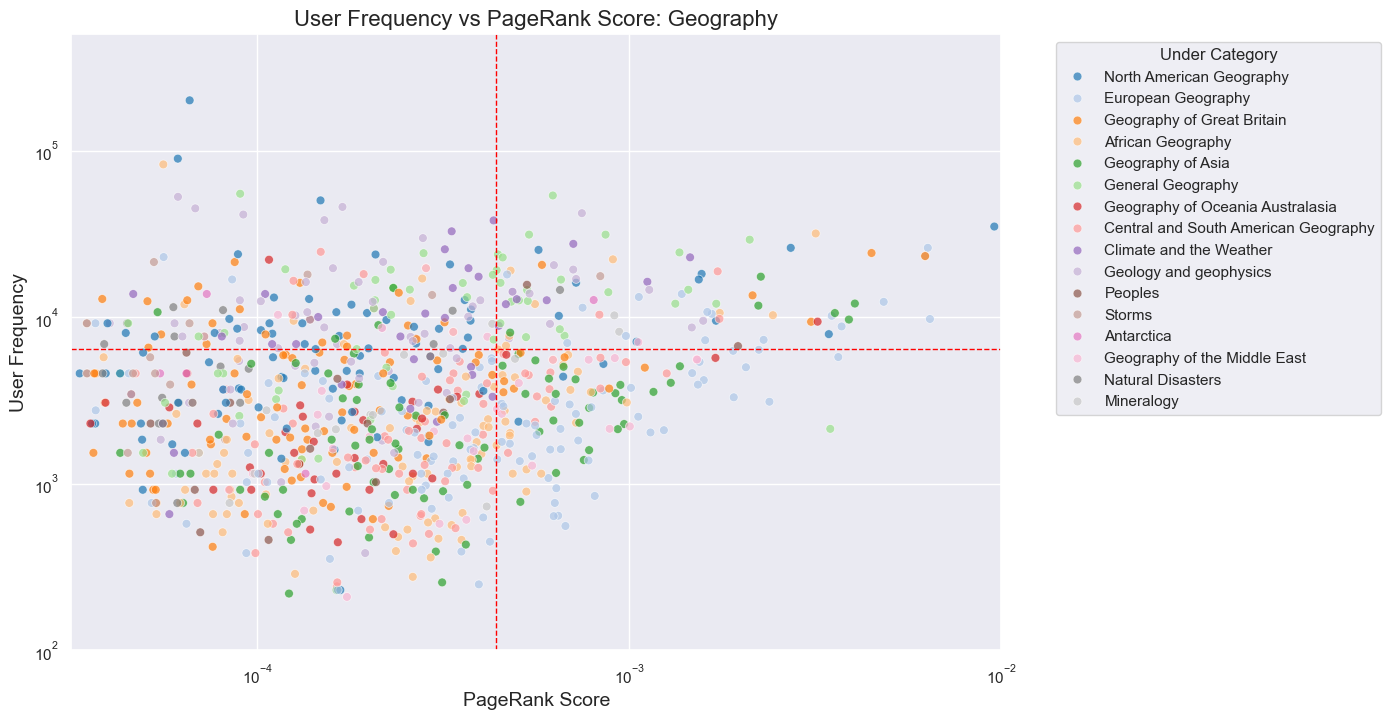

In [53]:
# plot_pageVSfreq(freVpr, category='Geography') # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category='Geography')

The categories that tend toward the upper left quadrant, displaying a higher concentration of outliers compared to other articles, include North American Geography, General Geography, and Geology and Geophysics. As previously stated and illustrated in the first plot, countries constitute the majority of articles in the lower right quadrant. Notably, the countries typically considered more "well-known" tend to have higher frequencies of usage by players.

The tendency of North American Geography to cluster in the upper left quadrant supports, to some extent, the claims regarding these quadrants. It can be assumed that players generally have a better understanding of regions like the United States compared to other parts of the world, such as countries like Latvia, Laos, or Lebanon found in the lower right quadrant. However, it is important to note that two of the largest outliers in the upper left quadrant have "United States" in their article names, likely selected by players only as a means to reach the article "United States." These instances should not be taken into account when drawing broader conclusions.

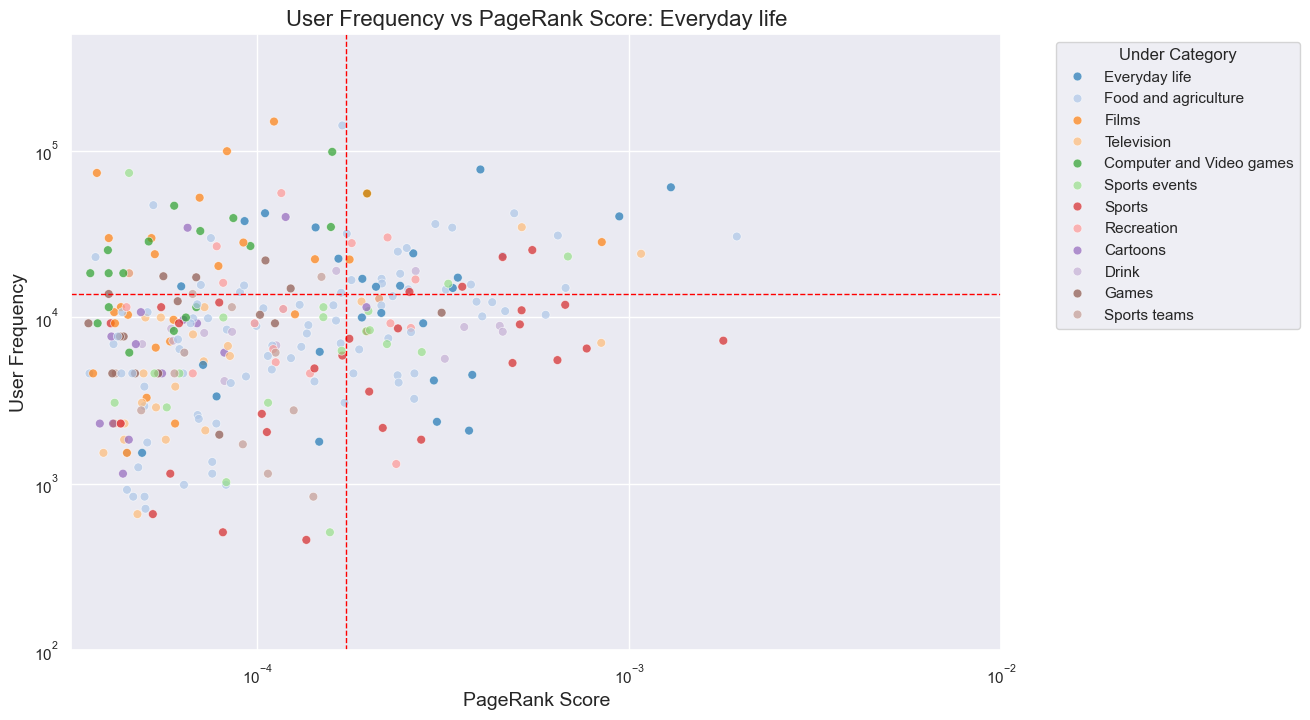

In [54]:
# plot_pageVSfreq(freVpr, category='Everyday life') # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category='Everyday life')

The majority of articles with lower PageRank scores but above-average frequency of usage by players belong to the "Film" and "Computer and Video Games" categories, featuring well-known pop cultural phenomena such as Star Wars, Nintendo, and Mario. Sports articles constitute a significant portion of the "Everyday Life" category found in the lower right quadrant.  

The fact that the articles in the upper left quadrant largely consist of big pop cultural phenomena again supports the idea that categories in the upper left quadrant may represent more common knowledge compared to those in the lower right quadrant, which tend to involve less widely recognized topics. These pop cultural references are often assumed to be well-known globally, further reinforcing the notion of common knowledge. However, the presence of "United States" as an outlier in the upper left quadrant reduces its relevance for this analysis, as players are likely selecting it solely to reach the article "United States," rather than reflecting broader knowledge.

The significant presence of sports in the lower right quadrant is somewhat surprising, as many of these topics—such as Volleyball, Badminton, and Ice Hockey—can be considered less universally recognized. However, articles like Football seem to be outliers in this context. That said, due to the lack of major outliers in the lower right quadrant, no definitive conclusions should be drawn from this observation.

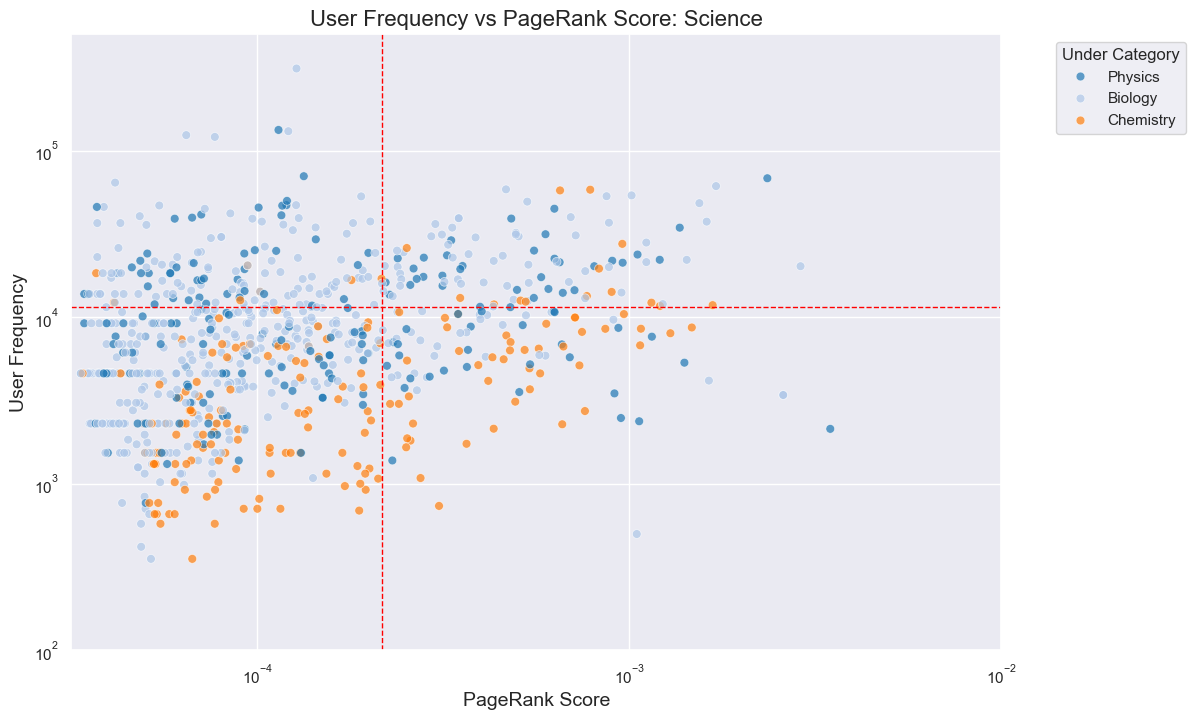

In [55]:
# plot_pageVSfreq(freVpr, category='Science') # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category='Science')

Chemistry shows almost no articles in the upper left quadrant, but a large proportion in the lower right. Physics is highly scattered, with articles in the upper left largely related to space, while those in the lower right are more focused on low-level physics topics. Biology is also dispersed, with animals predominantly featured in the upper left quadrant, while lower-level articles dominate the lower right quadrant.

These patterns reinforce trends that align with everyday knowledge—topics like animals and well-known space missions, such as the Moon Landing, tend to cluster in the upper left quadrant, while more academic or specialized subjects are found in the lower right quadrant. This supports the claim that the relationship between quadrants and common knowledge is valid.

To validate or refute the findings on common knowledge, we have decided to gather external data by collecting the average monthly view counts of Wikipedia pages. The number of views reflects the popularity and visibility of specific topics, helping to identify which articles are frequently accessed not just because of their centrality in the network, but potentially due to their familiarity to users. By comparing these view counts with our previous results, we aim to determine if the observed results are evidence of common knowledge or if they are still influenced by other factors and can not lead to any conclusion yet. The following plot shows the mean monthly views accross the two quadrants of interest.

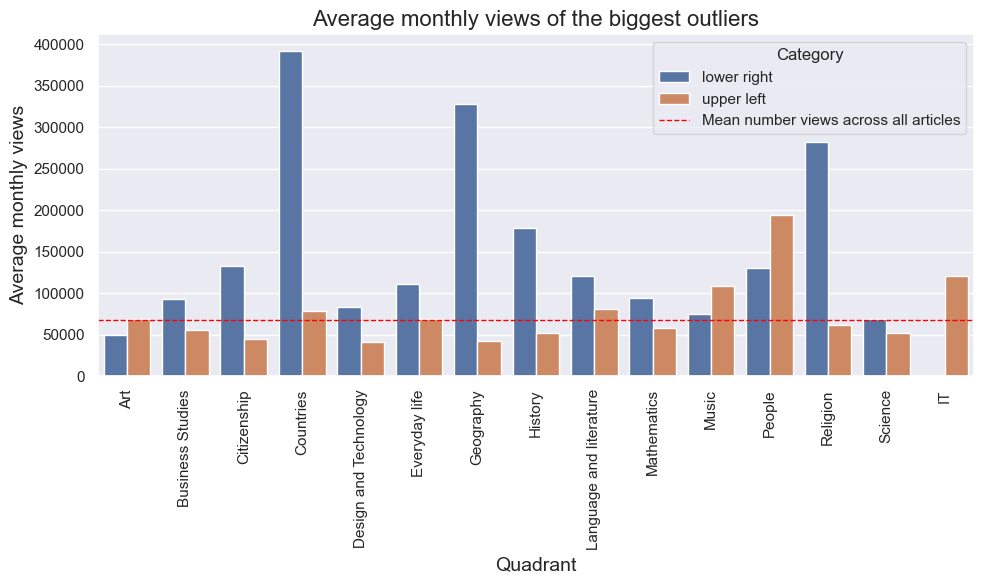

Spearman correlation between amount of views and user frequency:  0.07146499661979555
Spearman correlation between amount of views and pagerank score:  0.5653487198342274


In [100]:
get_quadrant_views(freVpr)


First we see from the spearman correlation factor that the number of views (hence common knowledge) doesn't seem to be correlated with the frequency of use by players. This supports what we said earlier as the frequency of use by players is influenced by many factors and can not be directly linked to common knowledge.

The results of the plot are on first glance a bit counter intuitive, since the a normal assumption would be that articles that constitutes common knowledge more would have a higher rate of visits. Accross all categories only People and Music have a higher rate of visits in the upper left quadrant compared to the lower right quadrant. Some other categories like Geography or Countries have inverse results, which is surprising. 
We can explain this by the fact that user frequency is really dependant of the type of games played by users, and in our dataset the games are not uniformly distributed, for example one game (Asteroid to Viking) makes up 20% of the games, so articles directly linked to these games will have a higher frequency of use. With a more uniform distribution of games we might see a different result.

So we can conclude that on this data we can not base our conclusion for common knowledge only on the frequency of use by players and the hub score of the articles.

A more accurate approach to determine common knowledge could be to examine how often players choose to bypass a more central article in favor of a less optimal one, by comparing their hubness score. We investigate cases where alternative choices have the same or shorter shortest-path distance to the target, in order to reveal which articles are frequently overlooked by players.

In [57]:
column_sums_overlooked, df_hubscopy = load_overlooked_score(data, df_hubs)

Total choices made: 254338
Choices with higher PageRank alternatives: 147831
Percentage: 58.12%


/Users/madeleine/Desktop/ada-2024-project-adaventure/src/fork.py:102: RuntimeWarning: invalid value encountered in divide
  column_sums = np.where(column_sums_unused > 10, column_sums_forgone / column_sums_unused, np.nan)


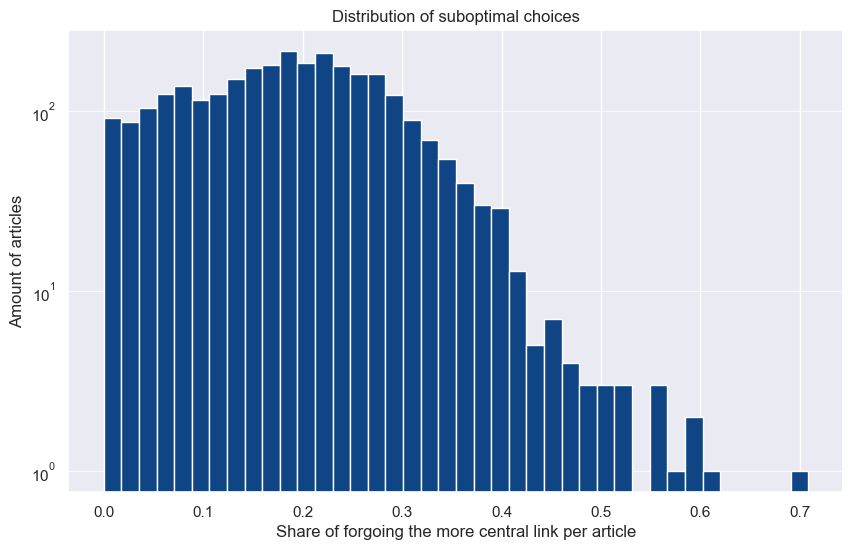

The articles that are forgone the most are:
                                    Article  Forgone Value  Column Sums UL
433                                    Bran       0.708333            24.0
2601                          Thomas Edison       0.619048           126.0
1870                           Nikola Tesla       0.595156           289.0
1609                           Lyme disease       0.588889            90.0
196                                Aquarium       0.573248           628.0
2325                          Schizophrenia       0.564286           280.0
1251                     History of science       0.562212           217.0
37                              90377 Sedna       0.550000            20.0
1711                             Meningitis       0.527027            74.0
2037                     Philosophy of mind       0.522124           113.0
1724              Metric expansion of space       0.515152            33.0
966                        Fertile Crescent       0.5126

In [58]:
plot_badChoices(column_sums_overlooked)

As expected, users frequently deviate from the most central navigation path. A remarkable 41.9% of choices are optimal in this context. Notably, some articles are overlooked more frequently than others, which poses the question if they are less known by the players. The following scatter plot seeks to answer this.

In [126]:
plot_hubScoreVSoverlooked(df_hubscopy)


This plot shows that the more central (higher PageRank) an article is, the more likely it is to be skipped (with a higher share of being overlooked), even when these articles could lead to the target just as quickly or faster while being more central to the wikispeedia network (according to their distance to the target article and their page rank score). This trend may be due to articles rarely linking to only one hub-like article, but instead linking to multiple and forcing a choice where the player is unaware of the exact page rank scores. However, certain patterns emerge when comparing articles with a similar page rank score. The category countries appears to be generally overlooked less than geography and both less than science. However this metric still does not help in identifying common knowledge, as can be shown with the examplary article 'Wasp' at a page rank score of 0.000092 is overlooked 24.3% of the time whereas 'George Byron, 6th Baron Byron' at a similar page rank score is merely overlooked 3.9% of the time.

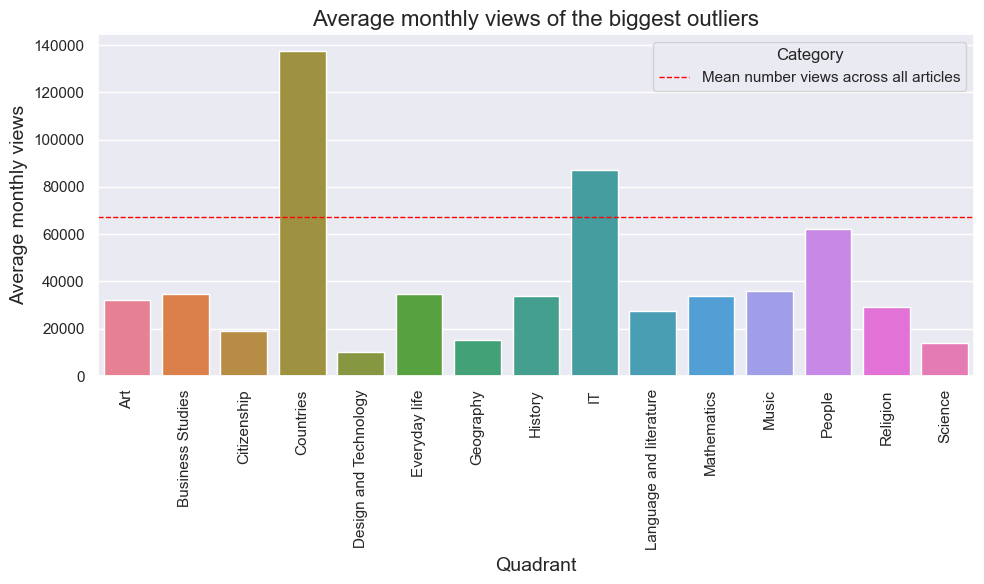

In [125]:
plot_views_forgone(data,df_hubscopy)

For almost all category we see that the top 10 overlooked articles have very low monthly views, which could indicate that these articles are not common knowledge. The only exception are countries and IT. This can be explained by the fact that countries are a lot looked up on wikipedia and that IT ?  

# CONCLUSION